In [38]:
import numpy as np
from matplotlib import pyplot as plt

In [56]:
n = 100
x = np.linspace(0.5, 1, n)
y = np.log2(x)

xnew = 4*x-3 #this goes from -1 to 1, in order to evaluate chebyshevs across their full range, not just half

global cs, lg
cs = np.polynomial.chebyshev.chebfit(xnew, y, 50)
lg = np.polynomial.legendre.legfit(xnew, y, 50)


In [57]:
ypred_cs = np.polynomial.chebyshev.chebval(xnew,cs)
ypred_lg = np.polynomial.legendre.legval(xnew,lg)

In [58]:
print(f"MAE for chebfit: {np.sqrt(((y-ypred_cs)**2).mean())}\nMAE for legfit: {np.sqrt(((y-ypred_lg)**2).mean())}")

MAE for chebfit: 1.0368742893086396e-15
MAE for legfit: 1.0367948629333988e-14


In [52]:
def mylog(x, type='cheb'):
    
    m1, exp1 = np.frexp(x)
    m2, exp2 = np.frexp(np.e)
    
#     m1 = 4*m1-3
#     m2 = 4*m2-3
    
    #mantissa range always 0.5 to 1
    if(type=='cheb'):
        logm1 = np.polynomial.chebyshev.chebval(m1,cs)
        logm2 = np.polynomial.chebyshev.chebval(m2,cs)
    elif(type=='leg'):
        logm1 = np.polynomial.legendre.legval(m1,lg)
        logm2 = np.polynomial.legendre.legval(m2,lg)
    
    return (logm1+exp1)/(logm2+exp2)
    

In [53]:
x_test = np.linspace(0.1,10,10)
y_test = np.log(x_test)
y_cs = mylog(x_test)
y_lg = mylog(x_test, type='leg')

In [54]:
np.abs(y_lg-y_test).mean()

0.26582220256982814

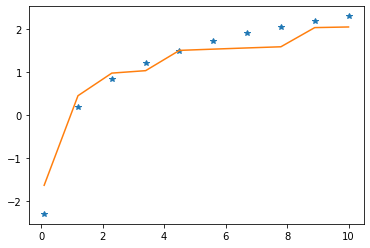

In [55]:
plt.clf()
plt.plot(x_test,y_test, '*')
plt.plot(x_test, y_cs)